# Thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Tải lên dữ liệu

In [2]:
# Load dữ liệu
covid19_statistics_df = pd.read_csv('./Data/Covid19_Statistics_24_04_2022.csv')

# Khám phá thông tin dữ liệu

In [3]:
covid19_statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country,Other     228 non-null    object 
 1   TotalCases        228 non-null    int64  
 2   NewCases          108 non-null    float64
 3   TotalDeaths       219 non-null    float64
 4   NewDeaths         60 non-null     float64
 5   TotalRecovered    213 non-null    float64
 6   NewRecovered      90 non-null     float64
 7   ActiveCases       213 non-null    float64
 8   Serious,Critical  151 non-null    float64
 9   Tot Cases/1M pop  226 non-null    float64
 10  Deaths/1M pop     217 non-null    float64
 11  TotalTests        212 non-null    float64
 12  Tests/ 1M pop     212 non-null    float64
 13  Population        226 non-null    float64
 14  Continent         226 non-null    object 
dtypes: float64(12), int64(1), object(2)
memory usage: 26.8+ KB


In [4]:
covid19_statistics_df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent
0,China,200654,1580.0,4725.0,39.0,166398.0,2672.0,29531.0,236.0,139.0,3.0,1.600000e+08,111163.0,1.439324e+09,Asia
1,USA,82698955,28904.0,1018441.0,50.0,80465351.0,30438.0,1215163.0,1426.0,247219.0,3045.0,1.000491e+09,2990853.0,3.345170e+08,North America
2,India,43060086,2541.0,522223.0,30.0,42521341.0,1862.0,16522.0,698.0,30657.0,372.0,8.347177e+08,594287.0,1.404569e+09,Asia
3,Brazil,30349463,3809.0,662701.0,38.0,29384354.0,19954.0,302408.0,8318.0,140967.0,3078.0,6.377617e+07,296227.0,2.152952e+08,South America
4,France,28303931,58954.0,145060.0,40.0,25880480.0,27573.0,2278391.0,1677.0,431890.0,2213.0,2.664840e+08,4066284.0,6.553503e+07,Europe


In [5]:
# Kích thước tập dữ liệu
covid19_statistics_df.shape

(228, 15)

In [6]:
# Kiểm tra dữ liệu có bị lặp?
covid19_statistics_df.duplicated().sum()

0

In [7]:
# Kiểm tra dữ liệu có bị thiếu?
covid19_statistics_df.isna().sum()

Country,Other         0
TotalCases            0
NewCases            120
TotalDeaths           9
NewDeaths           168
TotalRecovered       15
NewRecovered        138
ActiveCases          15
Serious,Critical     77
Tot Cases/1M pop      2
Deaths/1M pop        11
TotalTests           16
Tests/ 1M pop        16
Population            2
Continent             2
dtype: int64

# Phân tích mối quan hệ giữa các trường dữ liệu

## Thống kê, phân phối của các trường dữ liệu

### Thống kê của các trường dữ liệu

In [8]:
df = covid19_statistics_df.iloc[:, 1:13]
df.head()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,200654,1580.0,4725.0,39.0,166398.0,2672.0,29531.0,236.0,139.0,3.0,1.600000e+08,111163.0
1,82698955,28904.0,1018441.0,50.0,80465351.0,30438.0,1215163.0,1426.0,247219.0,3045.0,1.000491e+09,2990853.0
2,43060086,2541.0,522223.0,30.0,42521341.0,1862.0,16522.0,698.0,30657.0,372.0,8.347177e+08,594287.0
3,30349463,3809.0,662701.0,38.0,29384354.0,19954.0,302408.0,8318.0,140967.0,3078.0,6.377617e+07,296227.0
4,28303931,58954.0,145060.0,40.0,25880480.0,27573.0,2278391.0,1677.0,431890.0,2213.0,2.664840e+08,4066284.0


In [9]:
df = covid19_statistics_df.iloc[:, 1:13]
df.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
count,2.280000e+02,108.000000,2.190000e+02,60.00000,2.130000e+02,90.000000,2.130000e+02,151.000000,226.000000,217.000000,2.120000e+02,2.120000e+02
mean,2.234908e+06,3997.888889,2.850919e+04,20.20000,2.116288e+06,6255.711111,8.933202e+04,280.900662,142570.230088,1152.350230,2.950472e+07,1.907725e+06
std,7.403856e+06,11785.573548,9.888751e+04,33.81094,7.309688e+06,14087.044076,3.081648e+05,878.272993,151578.993085,1208.026182,1.066547e+08,3.267406e+06
min,1.000000e+00,1.000000,1.000000e+00,1.00000,1.000000e+00,1.000000,0.000000e+00,1.000000,9.000000,2.000000,5.117000e+03,5.098000e+03
25%,2.258375e+04,30.000000,2.225000e+02,2.00000,1.394500e+04,40.250000,1.960000e+02,5.000000,11256.750000,172.000000,3.472968e+05,1.648125e+05
50%,1.630790e+05,220.500000,2.201000e+03,6.50000,1.311000e+05,364.000000,2.511000e+03,20.000000,88891.500000,765.000000,2.120364e+06,7.738495e+05
75%,1.065066e+06,1260.750000,1.393200e+04,19.75000,9.595930e+05,2890.250000,2.996900e+04,176.000000,239345.500000,1844.000000,1.224277e+07,2.215674e+06
max,8.269896e+07,64725.000000,1.018441e+06,168.00000,8.046535e+07,68278.000000,2.763054e+06,8318.000000,704445.000000,6294.000000,1.000491e+09,2.181288e+07


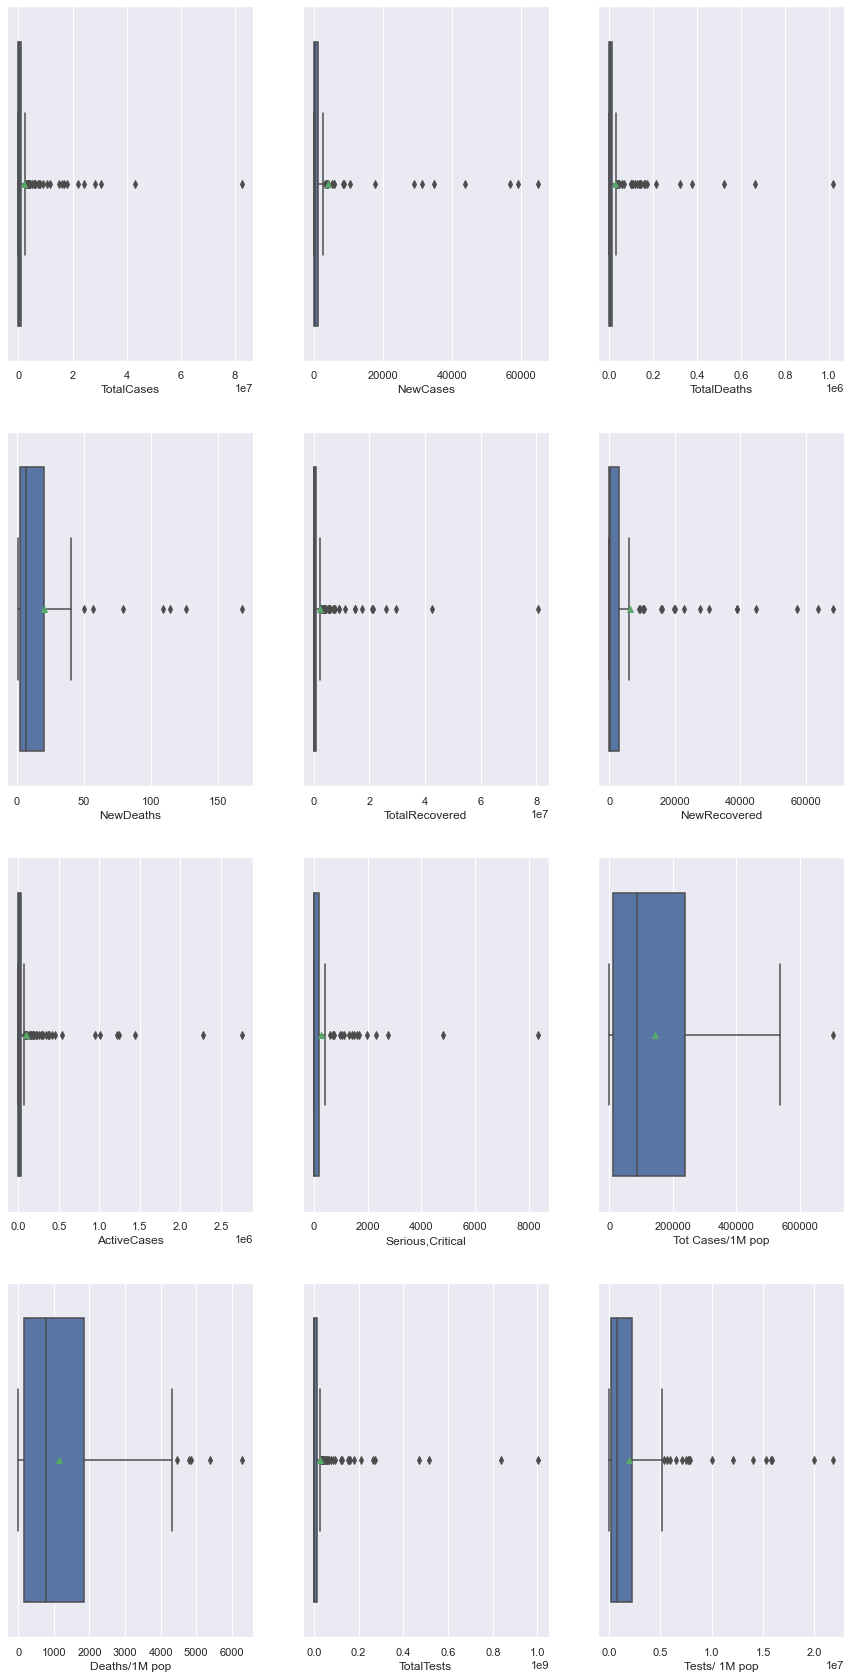

In [10]:
nrows = 4
ncols = 3

sns.set_theme(style= 'darkgrid')
fig, axes = plt.subplots(nrows, ncols, figsize= (15, 30))
for i, col in enumerate(df):
    sns.boxplot(data= df, x= col, ax= axes[i // ncols, i % ncols], showmeans= True)
plt.show()

Nhận xét: Dữ liệu tồn tại khá nhiều ngoại lệ.

### Phân phối của các trường dữ liệu

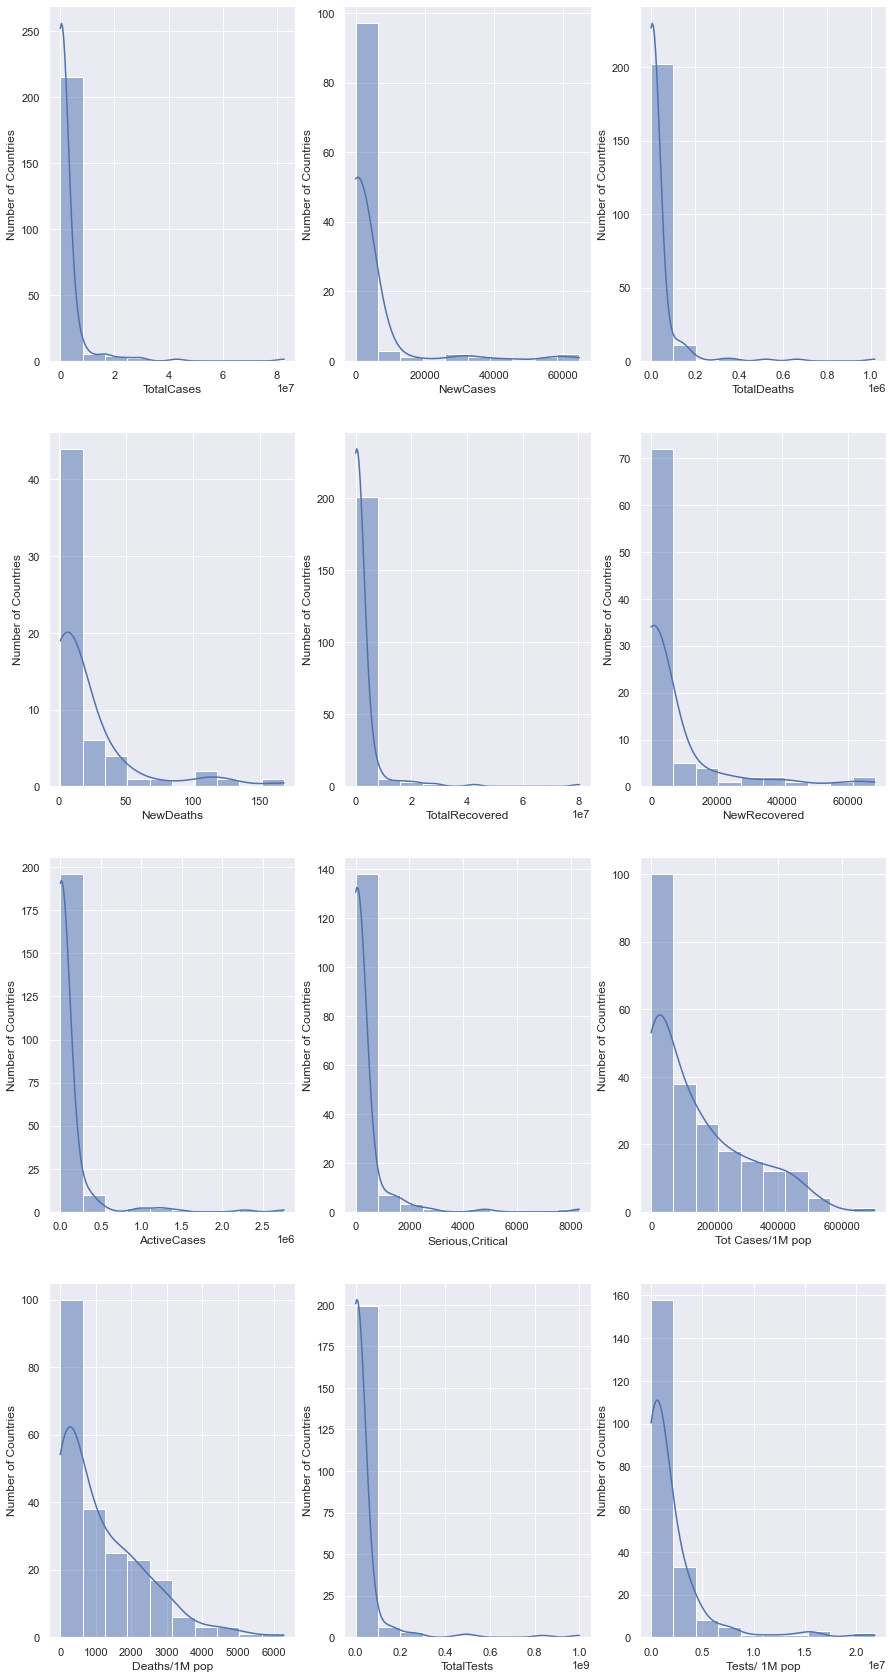

In [11]:
sns.set_theme(style= 'darkgrid')
fig, axes = plt.subplots(nrows, ncols, figsize= (15, 30))
for i, col in enumerate(df):
    sns.histplot(data= df, x= col, kde= True, bins= 10, ax= axes[i // ncols, i % ncols]).set_ylabel('Number of Countries')
plt.show()

Nhận xét:
- Tất cả các biểu đồ đều có xu hướng lệch trái => Phần lớn các quốc gia có các giá trị thống kê về tình hình COVID-19 ở mức thấp.

## Mối quan hệ giữa các trường dữ liệu

In [12]:
analysis_df = covid19_statistics_df[['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'TotalTests']]

### Kiểm tra tương quan giữa các trường dữ liệu

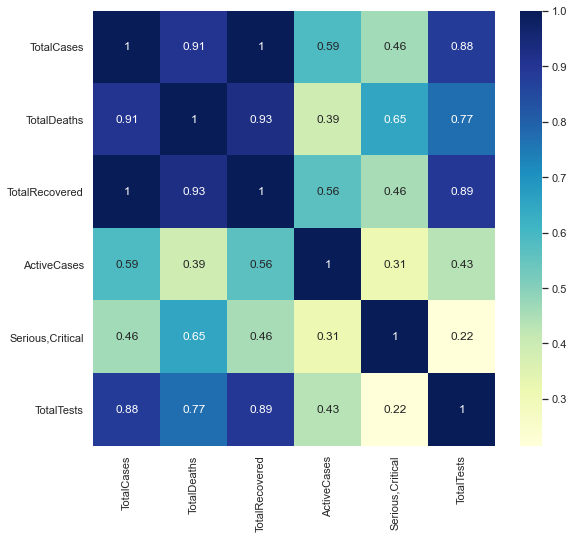

In [13]:
plt.figure(figsize= (9, 8))
sns.heatmap(data= analysis_df.corr(method= 'pearson'), cmap="YlGnBu", annot= True)
plt.show()

Biểu đồ hệ số tương quan trên đã cho ta thấy được mức độ tương quan hay độc lập giữa các biến dữ liệu:
- Các cặp biến tương quan hoàn hảo (0.9 - 1.0): 
    + TotalCases - TotalDeaths
    + TotalRecovered - TotalDeaths
    + TotalRecovered - TotalCases

- Các cặp biến tương quan mạnh (0.7 - 0.9): 
    + TotalCases - TotalTests
    + TotalDeaths - TotalTests
    + TotalRecovered - TotalTests


- Các cặp biến tương quan vừa (0.5 - 0.7): 
    + TotalCases - ActiveCases
    + TotalDeaths - Serious,Critical
    + TotalRecovered - ActiveCases

- Các cặp biến tương quan yếu (0.1 - 0.5): 
    + TotalDeaths - ActiveCases
    + TotalCases - Serious,Critical
    + TotalRecovered - Serious,Critical
    + ActiveCases - Serious,Critical
    + TotalTests - ActiveCases
    + TotalTests - Serious,Critical

### Biều đồ Scatter biểu thị mối quan hệ giữa các trường dữ liệu

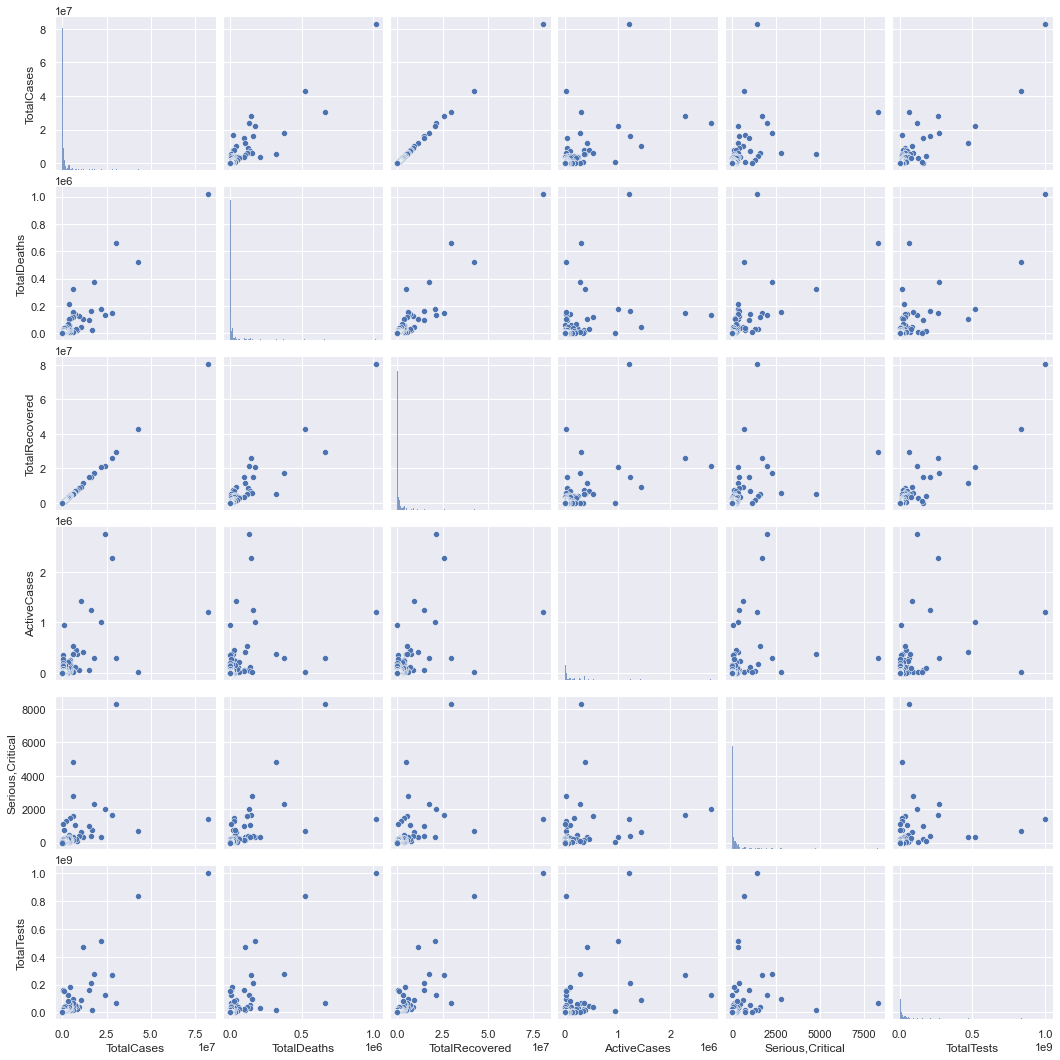

In [14]:
sns.pairplot(data= analysis_df)
plt.show()

Dựa vào biểu đồ trên ta có thể thấy được một số cặp trường dữ liệu có mối quan hệ nhân quả:
- TotalDeaths - TotalCases
- TotalRecovered - TotalCases
- TotalTests - TotalCases
- TotalRecovered - TotalTests
...

Ta sẽ sử dụng mô hình hồi quy để xác định và kiểm chứng rõ hơn.

### Mô hình hồi quy tuyến tính cho các mối quan hệ nhân quả

In [15]:
# Hàm cho mô hình hồi quy tuyến tính và trực quan hóa
def linear_regression(dx, dy, dataframe):
    linear_model_formula = dy + '~' + dx
    result = smf.ols(linear_model_formula, data= dataframe).fit()
    print(result.summary(), '\n')
    plt.figure(figsize= (10, 10))
    sns.scatterplot(x= dataframe[dx], y= dataframe[dy])
    sns.lineplot(x= dataframe[dx], y= result.predict(dataframe[dx]), color= 'coral')
    plt.xlabel(dx)
    plt.ylabel(dy)
    plt.legend(labels= ['Predict values', 'Truth values'])
    plt.show()
    print(f'Mô hình có thể giải thích được {result.rsquared} sự thay đổi của trường dữ liệu {dx}')

                            OLS Regression Results                            
Dep. Variable:            TotalDeaths   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1019.
Date:                Sun, 01 May 2022   Prob (F-statistic):           6.48e-84
Time:                        21:19:40   Log-Likelihood:                -2638.7
No. Observations:                 219   AIC:                             5281.
Df Residuals:                     217   BIC:                             5288.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    806.2375   2937.924      0.274      0.7

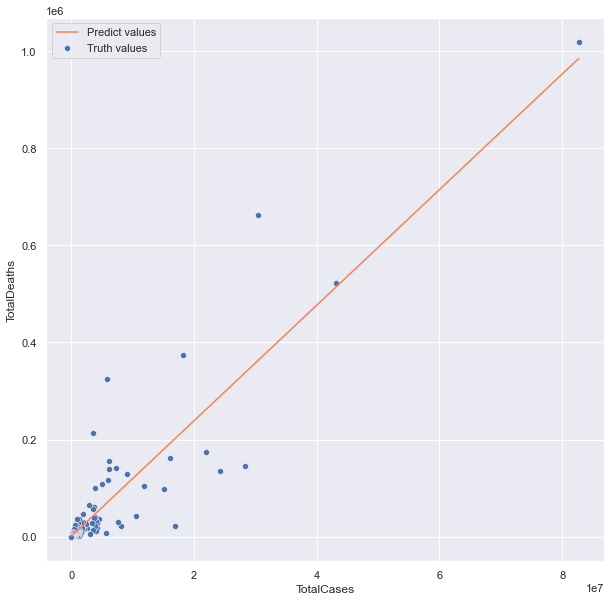

Mô hình có thể giải thích được 0.8243781388765534 sự thay đổi của trường dữ liệu TotalCases


In [16]:
linear_regression('TotalCases', 'TotalDeaths', analysis_df)

Nhận xét:
- Từ biểu đồ trên có thể thấy được mối quan hệ nhân quả của 2 trường dữ liệu TotalCases và TotalDeaths.
- Giá trị của trường dữ liệu TotalCases tăng thì giá trị của trường dữ liệu TotalDeaths cũng tăng.
- Tỉ lệ dự đoán số ca tử vong thông qua số ca nhiễm của mô hình cao.

                            OLS Regression Results                            
Dep. Variable:         TotalRecovered   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.073e+05
Date:                Sun, 01 May 2022   Prob (F-statistic):          1.00e-317
Time:                        21:19:40   Log-Likelihood:                -2934.2
No. Observations:                 213   AIC:                             5872.
Df Residuals:                     211   BIC:                             5879.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.61e+04   1.67e+04     -2.163      0.0

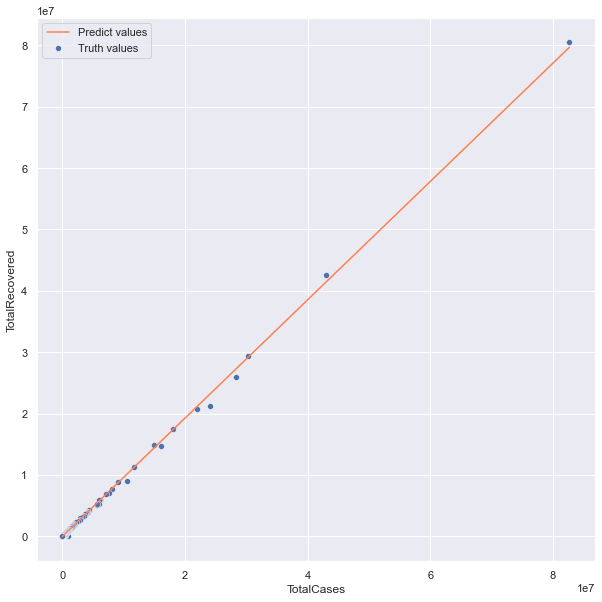

Mô hình có thể giải thích được 0.998983236669605 sự thay đổi của trường dữ liệu TotalCases


In [17]:
linear_regression('TotalCases', 'TotalRecovered', analysis_df)

Nhận xét:
- Từ biểu đồ trên có thể thấy được mối quan hệ nhân quả của 2 trường dữ liệu TotalCases và TotalRecovered.
- Giá trị của trường dữ liệu TotalCases tăng thì giá trị của trường dữ liệu TotalRecovered cũng tăng.
- Tỉ lệ dự đoán số ca hồi phục thông qua số ca nhiễm của mô hình rất cao, gần như chính xác.

                            OLS Regression Results                            
Dep. Variable:             TotalCases   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     725.0
Date:                Sun, 01 May 2022   Prob (F-statistic):           4.92e-70
Time:                        21:19:41   Log-Likelihood:                -3502.3
No. Observations:                 212   AIC:                             7009.
Df Residuals:                     210   BIC:                             7015.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.384e+05   2.59e+05      2.078      0.0

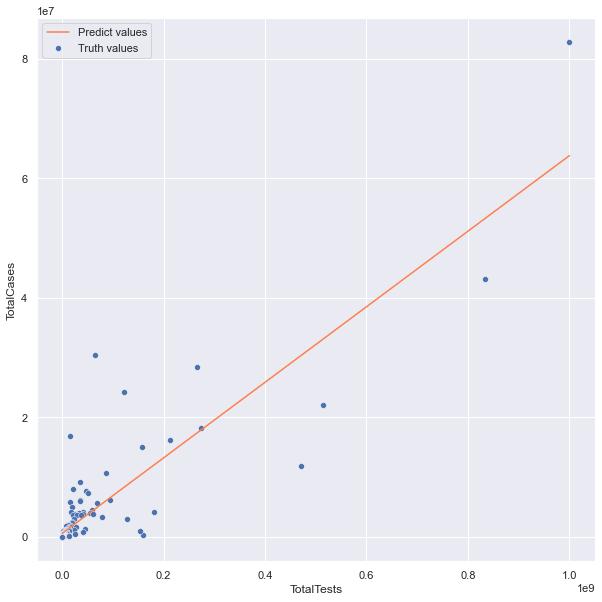

Mô hình có thể giải thích được 0.775404380663602 sự thay đổi của trường dữ liệu TotalTests


In [18]:
linear_regression('TotalTests', 'TotalCases', analysis_df)

Nhận xét:
- Từ biểu đồ trên có thể thấy được mối quan hệ nhân quả của 2 trường dữ liệu TotalCases và TotalTests.
- Giá trị của trường dữ liệu TotalCases tăng thì giá trị của trường dữ liệu TotalTests cũng tăng.
- Tỉ lệ dự đoán số ca nhiễm thông qua số ca test của mô hình khá cao.

### Phân tích về tình hình COVID-19

#### Tình hình COVID-19 theo từng khu vực

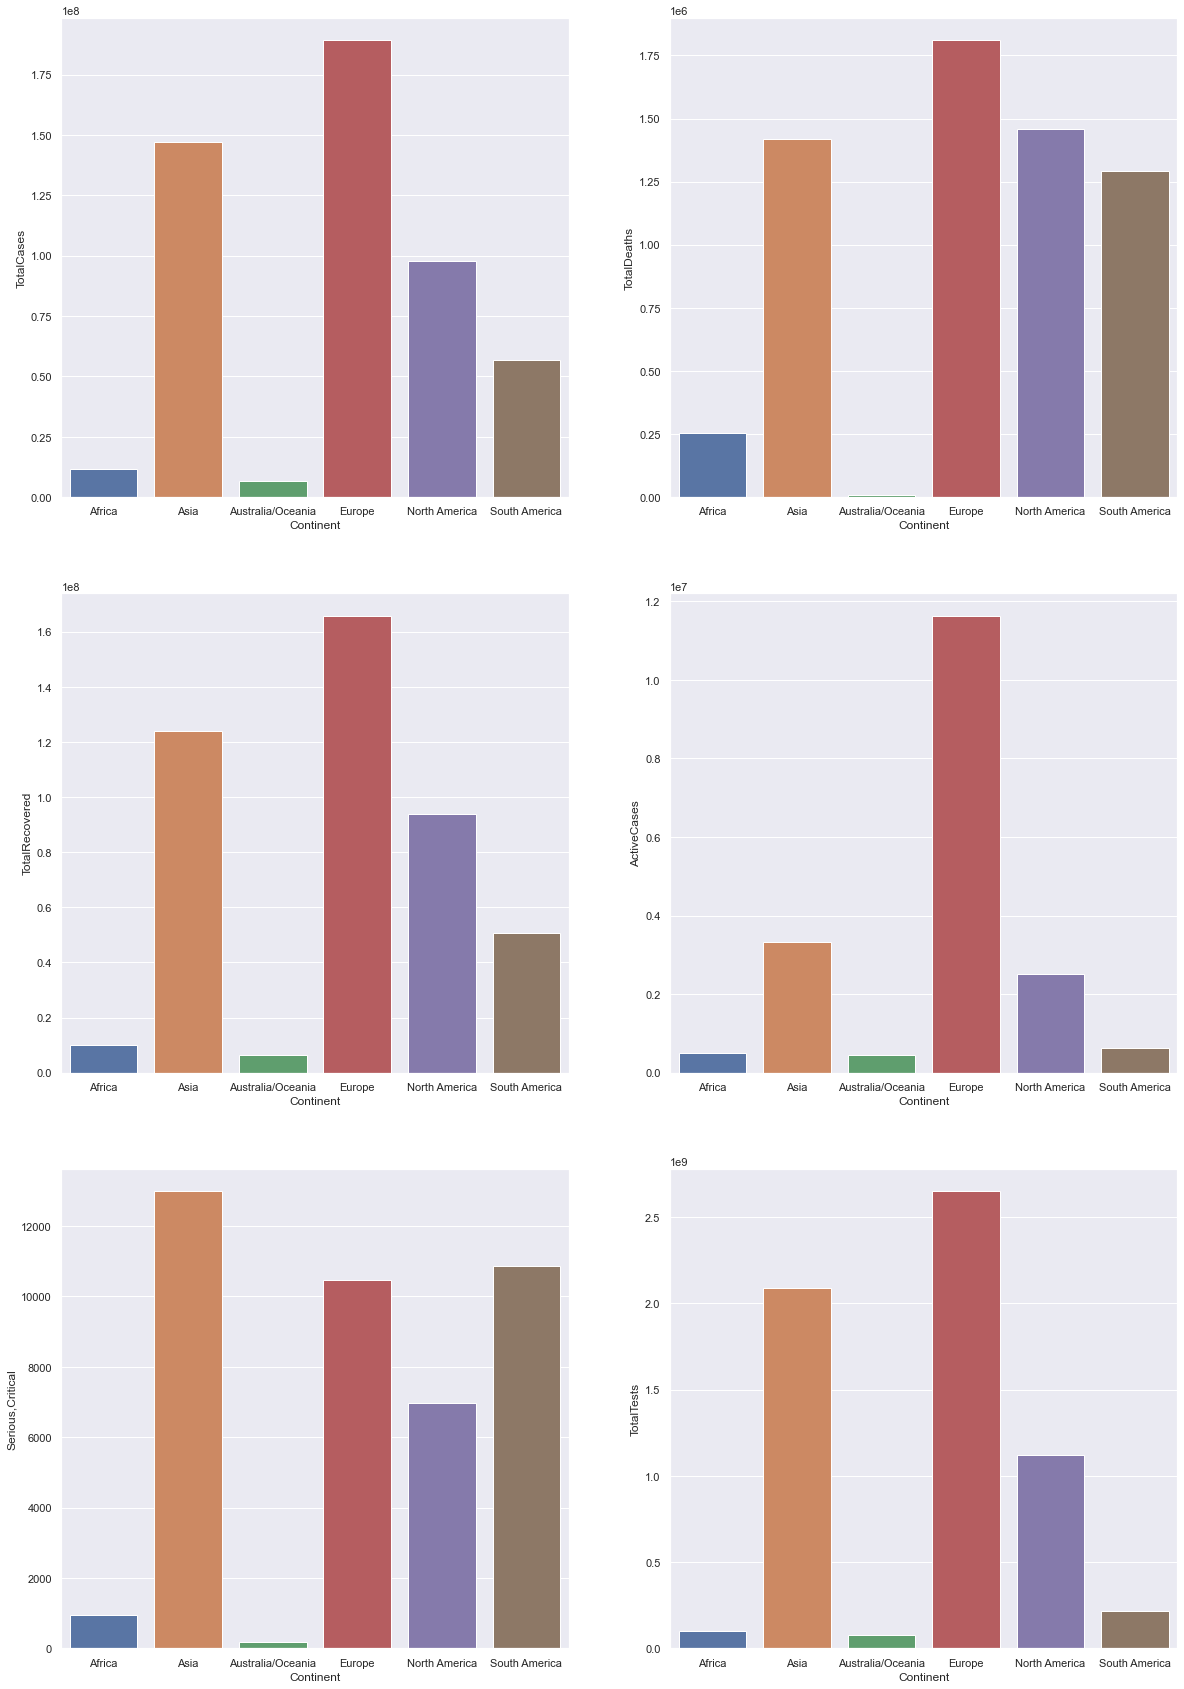

In [19]:
area_analysis_df = covid19_statistics_df[['Continent', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'TotalTests']]
area_analysis_groupby_df = area_analysis_df.groupby(['Continent']).agg(["sum"])
labels = area_analysis_groupby_df.index
nrows = 3
ncols = 2

sns.set_theme(style= 'darkgrid')
fig, axes = plt.subplots(nrows, ncols, figsize= (20, 30))
for i, col in enumerate(analysis_df):
    sns.barplot(x= labels, y= area_analysis_groupby_df[col]["sum"], ax= axes[i // ncols, i % ncols]).set_ylabel(col)
plt.show()


Nhận xét:
- Châu Âu là khu vực có số tổng ca nhiễm, số ca tử vong, hồi phục, số ca nhiễm và xét nghiệm cao nhất cao nhất.
- Châu Á là khu vực có số ca bệnh nặng nhiều nhất.
- Khu vực Châu Úc có các thông số thấp nhất.

#### Cơ cấu thành phần ca nhiễm COVID-19 trên từng khu vực

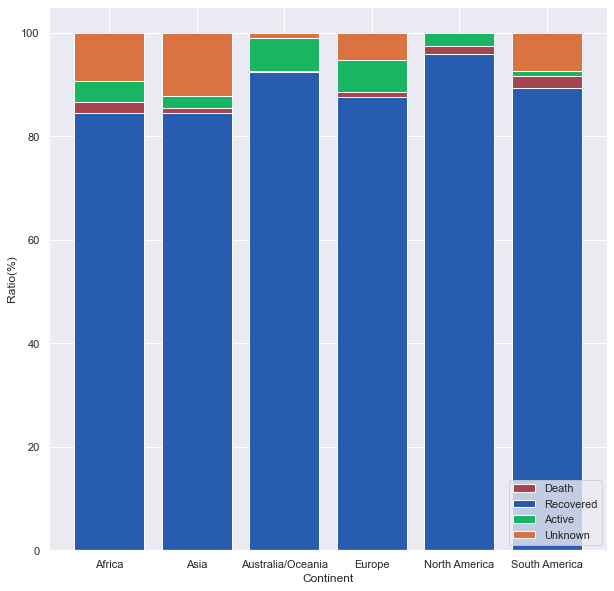

In [20]:
# TotalDeaths + TotalRecovered + ActiveCases = TotalCases
colors = ["#a64450", "#285cb0", '#18b562', '#db7242']
death_ratio = (area_analysis_groupby_df['TotalDeaths'] / area_analysis_groupby_df['TotalCases']) * 100.0
recovered_ratio = (area_analysis_groupby_df['TotalRecovered'] / area_analysis_groupby_df['TotalCases']) * 100.0
active_cases_ratio = (area_analysis_groupby_df['ActiveCases'] / area_analysis_groupby_df['TotalCases']) * 100.0
unknown_ratio = 100.0 - (death_ratio + recovered_ratio + active_cases_ratio)

fig, axes = plt.subplots(1, 1, figsize= (10, 10))
axes.bar(x= labels, height= death_ratio["sum"], bottom= recovered_ratio["sum"], label = 'Death', color= colors[0])
axes.bar(x= labels, height= recovered_ratio["sum"], label = 'Recovered', color= colors[1])
axes.bar(x= labels, height= active_cases_ratio["sum"], bottom= recovered_ratio["sum"] + death_ratio["sum"], label = 'Active', color= colors[2])
axes.bar(x= labels, height= unknown_ratio["sum"], bottom= recovered_ratio["sum"] + death_ratio["sum"] + active_cases_ratio["sum"], label = 'Unknown', color= colors[3])
plt.xlabel('Continent')
plt.ylabel('Ratio(%)')
plt.legend(loc= 4)
plt.show()

Nhận xét:
- Cơ cấu tỉ lệ tử vong, hồi phục, ca nhiễm giữa các khu vực khá tương đồng.
- Nam Mỹ là khu vực có tỉ lệ tử vong cao nhất.
- Bắc Mỹ là khu vực có tỉ lệ hồi phục cao nhất.
- Châu Úc là khu vực có tỉ lệ ca nhiễm cao nhất.

#### Top 10 quốc gia đứng đầu về một số thông số

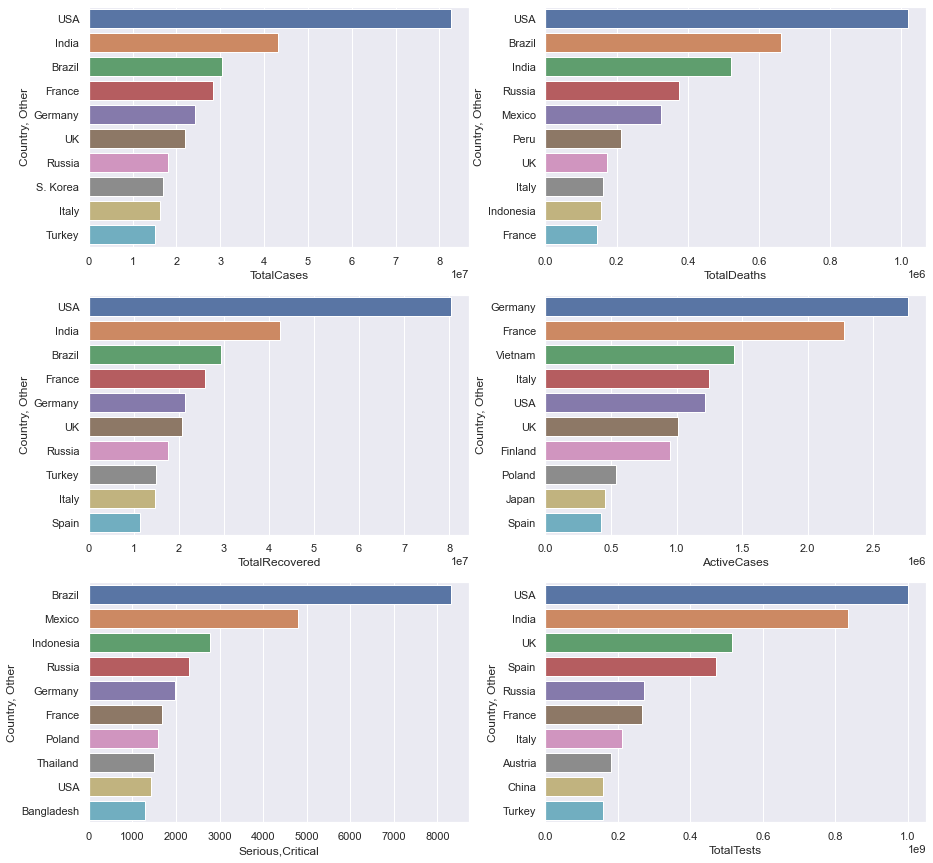

In [21]:
nrows = 3
ncols = 2

sns.set_theme(style= 'darkgrid')
fig, axes = plt.subplots(nrows, ncols, figsize= (15, 15))
for i, col in enumerate(analysis_df):
    sample_df = covid19_statistics_df[['Country,Other', col]]
    sample_df = sample_df.nlargest(10, col).sort_values(col, ascending= False)
    sns.barplot(data= sample_df, x= col, y= 'Country,Other', ax= axes[i // ncols, i % ncols]).set_ylabel('Country, Other')
plt.show()


Nhận xét: Các có các thông số cao nhất là các nước có nền kinh tế thuộc vào nhóm phát triển như Mỹ, Pháp, Đức, Nga...

#### Tình hình COVID-19 Việt Nam so với thế giới

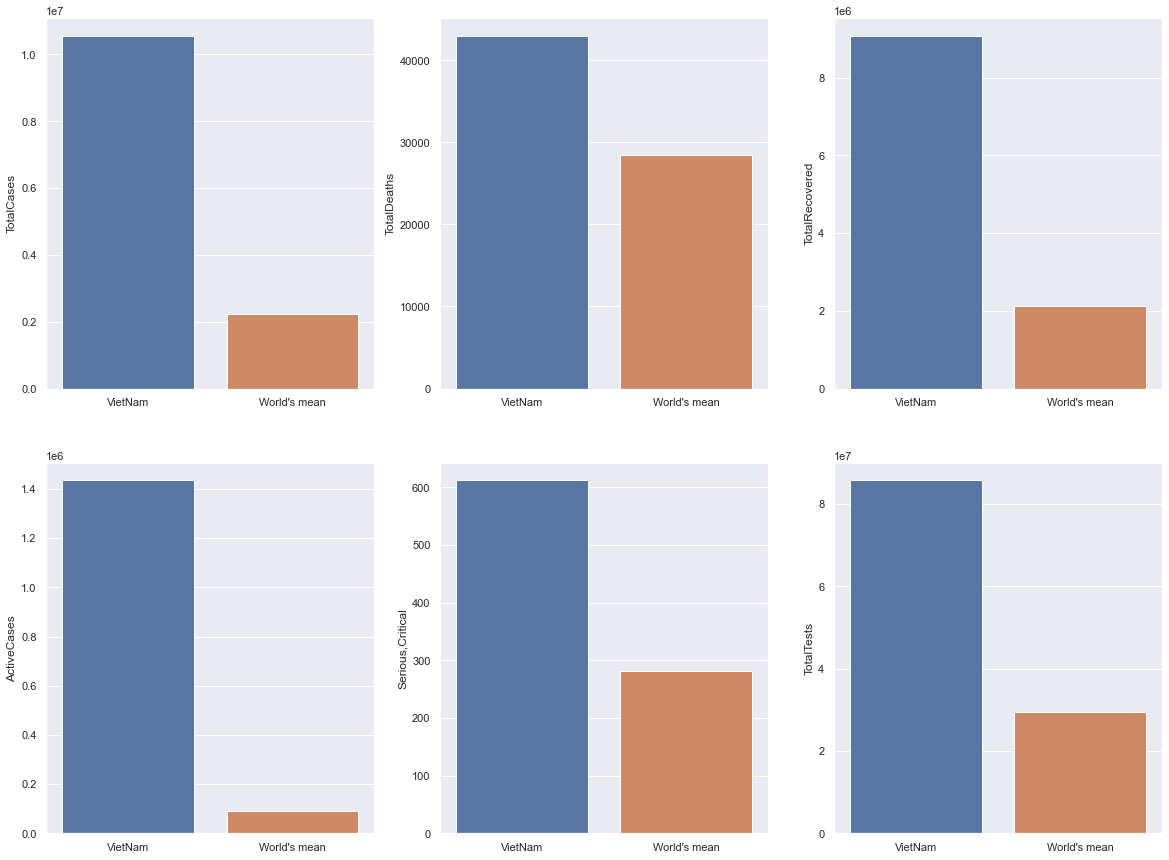

In [22]:
cols = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Serious,Critical', 'TotalTests']
world_mean_covid19 = np.array(np.mean(covid19_statistics_df[cols]))
vietnam_covid19 = np.array(covid19_statistics_df[covid19_statistics_df['Country,Other'] == 'Vietnam'][cols])[0]
comparison_df = pd.DataFrame()
comparison_df['VietNam'] = vietnam_covid19
comparison_df['World'] = world_mean_covid19

nrows = 2
ncols = 3

sns.set_theme(style= 'darkgrid')
fig, axes = plt.subplots(nrows, ncols, figsize= (20, 15))
for i, col in enumerate(cols):
    sns.barplot(data= comparison_df, x= ['VietNam', 'World\'s mean'], y= comparison_df.values[i], ax= axes[i // ncols, i % ncols]).set_ylabel(col)
plt.show()

Nhận xét: các số liệu về COVID-19 của Việt Nam cao hơn so với trung bình trên toàn thế giới

#### Cơ cấu thành phần số ca nhiễm COVID-19 của Việt Nam

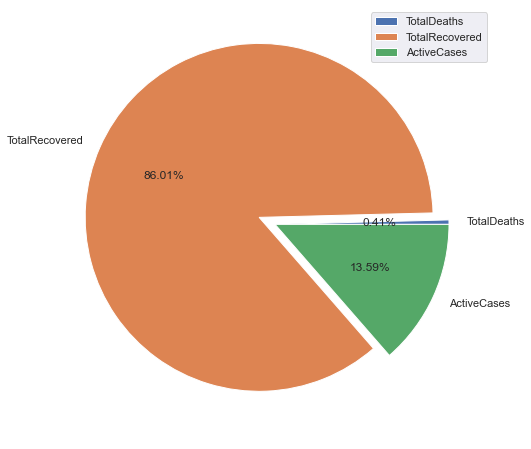

In [23]:
# TotalDeaths + TotalRecovered + ActiveCases = TotalCases
cols = ['TotalDeaths','TotalRecovered','ActiveCases']
vietnam_covid19_df = covid19_statistics_df[covid19_statistics_df['Country,Other']=='Vietnam'][cols]
plt.figure(figsize=(8,8))
plt.pie(x= vietnam_covid19_df.values[0], labels = cols, explode=(0, 0.1, 0), autopct="%.2f%%")
plt.legend();

Nhận xét: 
- Có cơ cấu tương đồng với các khu vực trên thế giới.
- Có tỉ lệ tử vong và số ca nhiễm tương đối thấp trong khi tỉ lệ hồi phục cao => Cho thấy khả năng chống dịch tốt của Việt Nam